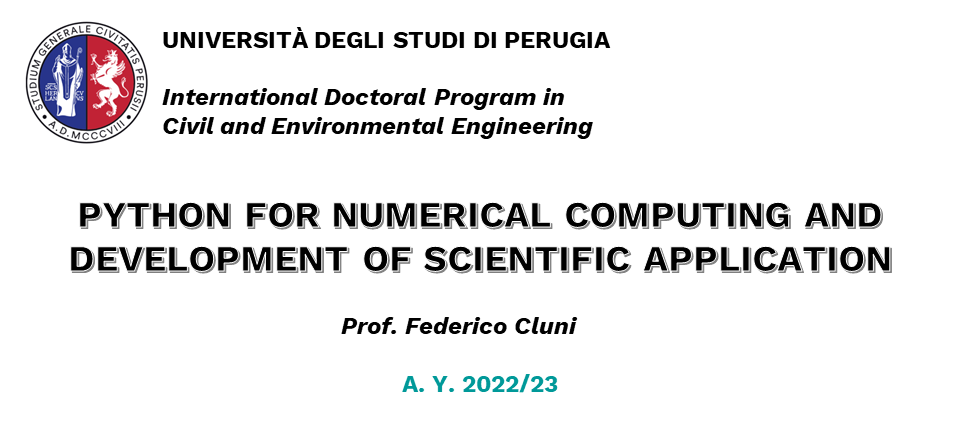

## Lesson #7 - May 20, 2023
<hr>

The examples are adapted from:

R. Johansson, "Numerical Python: Scientific Computing and Data Science Applications With Numpy, Scipy and Matplotlib", Apress, 2018

In [1]:
import numpy as np
import numpy.linalg
import numpy.random as rd
import scipy
from scipy import linalg, optimize, integrate, fft
import matplotlib
import matplotlib.pyplot as plt

# Optimization

## Univariate Optimization

Problem: minimize the area of a cylinder with unit volume.

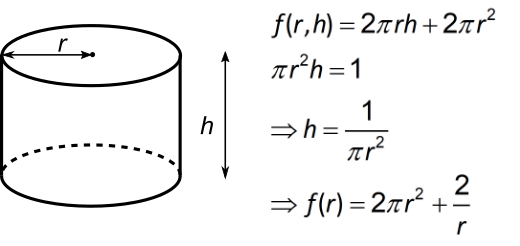

In [2]:
f = lambda r: 2*np.pi*r**2+2/r

We'll use Brent's methd, so we need bracketing values:

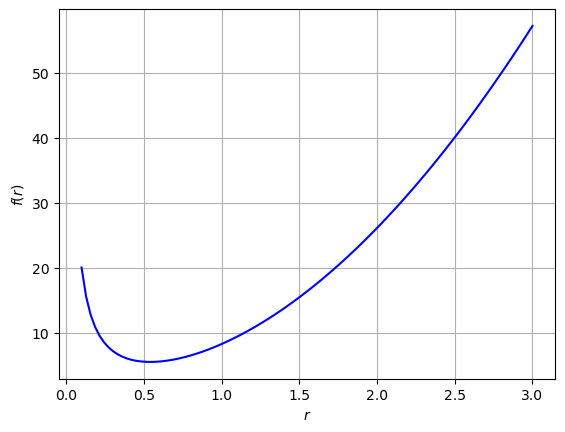

In [3]:
r = np.linspace(0.1,3,101)
fig, ax = plt.subplots()
ax.plot(r,f(r),'b-')
ax.set_xlabel('$r$')
ax.set_ylabel('$f(r)$')
plt.grid(True)

Note that we use `brent` method to fine **minima** (info [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html)), while we use `brentq` to find the **roots**.

In [8]:
r_min = optimize.brent(f,brack=(0.1,1))
print(f"Minimum equal to {f(r_min):8.3f} at r={r_min:8.3f}")

Minimum equal to    5.536 at r=   0.542


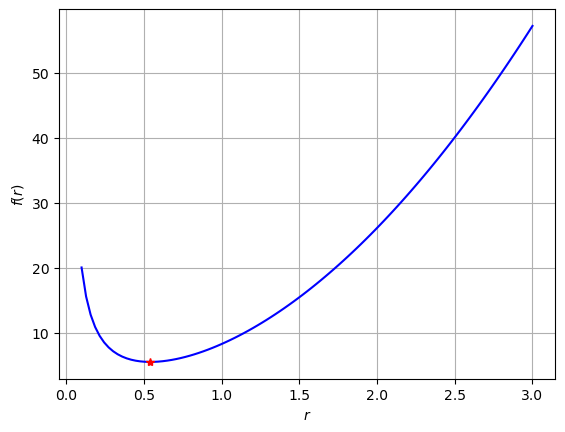

In [5]:
r = np.linspace(0.1,3,101)
fig, ax = plt.subplots()
ax.plot(r,f(r),'b-')
ax.plot([r_min],[f(r_min)],'r*')
ax.set_xlabel('$r$')
ax.set_ylabel('$f(r)$')
plt.grid(True)

## Unconstrained Multivariate Optimization

Find the minimum of:

$$f(x_0, x_1) = (x_0-1)^4 +5(x_1-1)^2 - 2x_0x_1$$

The gradient is:

$$ \nabla f = \left[ \begin{array}{c} -2 x_1 + 4(x_0-1)^3 \\ -2x_0 + 10 x_1 -10 \end{array}\right]$$

The Hessian is:

$$ H(f)  = \left[ \begin{array}{cc} 12(x_0-1)^2 & -2 \\ -2 & 10  \end{array} \right]$$

In [9]:
def f(x):
    return (x[0]-1)**4 +5*(x[1]-1)**2 - 2*x[0]*x[1]

In [10]:
def fprime(x):
    return [-2*x[1]+4*(x[0]-1)**3, -2*x[0]+10*x[1]-10]

In [11]:
def fhess(x):
    return [[12*(x[0]-1)**2,-2],[-2,10]]

We use `fmin_ncg` which implement Newton's method, info [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_ncg.html).
Note that the we need an initial guess.

In [12]:
x_ini = [0,0]
x_opt = optimize.fmin_ncg(f, x_ini, fprime=fprime, fhess=fhess)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
         Hessian evaluations: 8


array([1.88292613, 1.37658523])

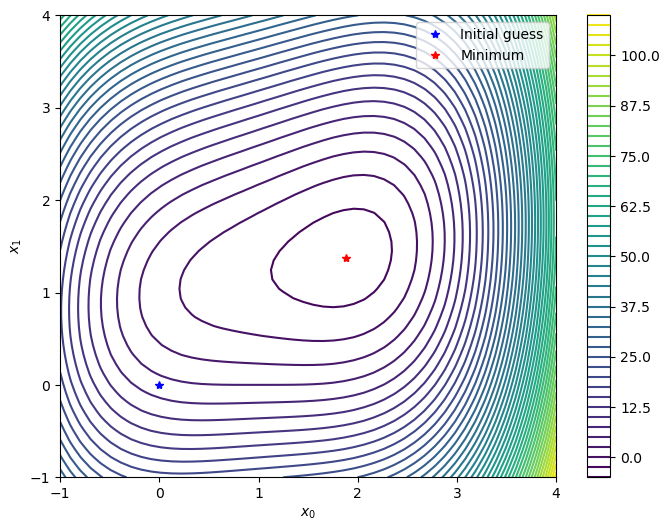

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
X, Y = np.meshgrid(np.linspace(-1,4),np.linspace(-1,4))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

plt.set_cmap('viridis') # for info, https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.legend()
ax.grid(False)

If it is not possible to give values for the  gradient and/or the hessian, we can use  `fmin_bfgs` (a quasi-Newton method which estimates numerically the gradient and the Hessian, see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html)) or `fmin_cg` (a variant of the steepest descent method, see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)). In both methods we need an initial guess.

In [14]:
optimize.fmin_bfgs(f, (0,0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [15]:
optimize.fmin_cg(f, (0,0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 54
         Gradient evaluations: 18


array([1.88292612, 1.37658522])

Sometimes, the fucntion has several local minima, so it is sifficult to chosse an appropriate initial guess, i.e. one for which a *global*, and non *local* minimum is found.

In [16]:
def f(x):
    return (4*np.sin(np.pi*x[0])+6*np.sin(np.pi*x[1]))+(x[0]-1)**2+(x[1]-1)**2

In [17]:
x_ini = [-1, -2]
x_opt, x_iter = optimize.fmin_bfgs(f, x_ini, retall=True)
x_opt

Optimization terminated successfully.
         Current function value: -3.813108
         Iterations: 7
         Function evaluations: 36
         Gradient evaluations: 12


array([3.37653057, 1.48365789])

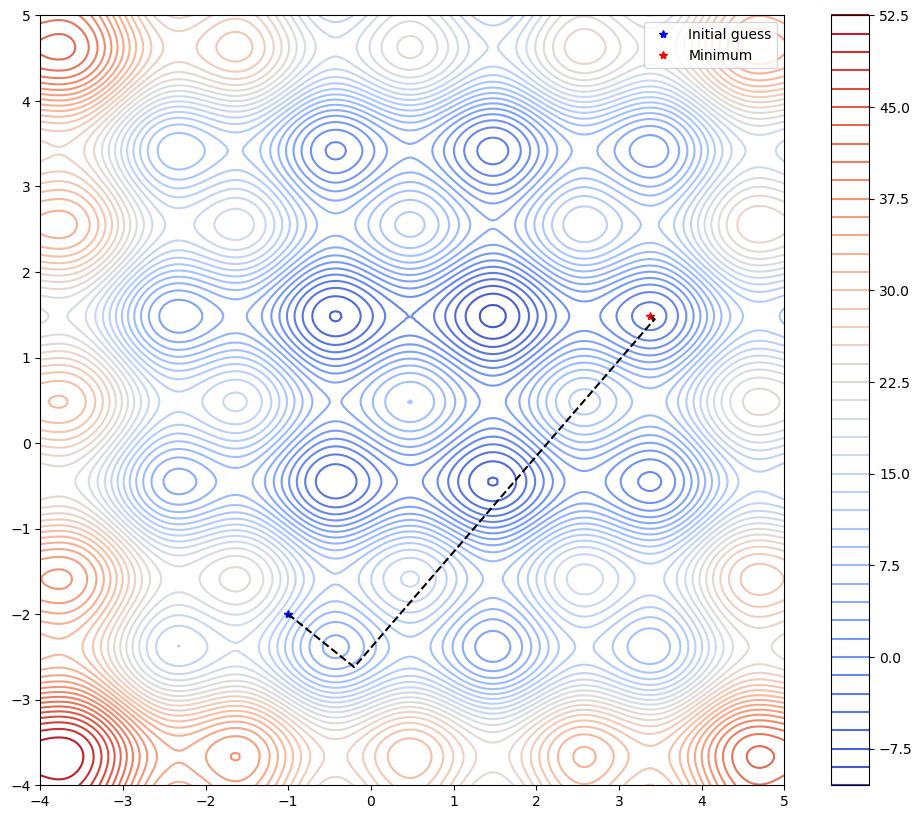

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,200),np.linspace(-4,5, 200))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

plt.set_cmap('coolwarm') # for info, https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
# ---
x_iter = np.array(x_iter)
ax.plot(x_iter[:,0],x_iter[:,1],'k--')
# ---
ax.legend()
ax.grid(False)

Evaluate the function in $x = [3.37653057, 1.48365789]$ and in $x = [-0.5,1.5]$ to verify we did not found the global minimum.

In [19]:
print(f(x_opt))
print(f([-.5,1.5]))

-3.81310756926848
-7.5


In this case a *brute force approach* can be usefull in order to find an estimate of a global minimum.

In [20]:
x_ini = optimize.brute(f, (slice(-3,5,0.5), slice(-3,4,0.5)), finish=None)
x_ini

array([1.5, 1.5])

In [21]:
x_opt = optimize.fmin_bfgs(f, x_ini)
x_opt

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


array([1.47586906, 1.48365787])

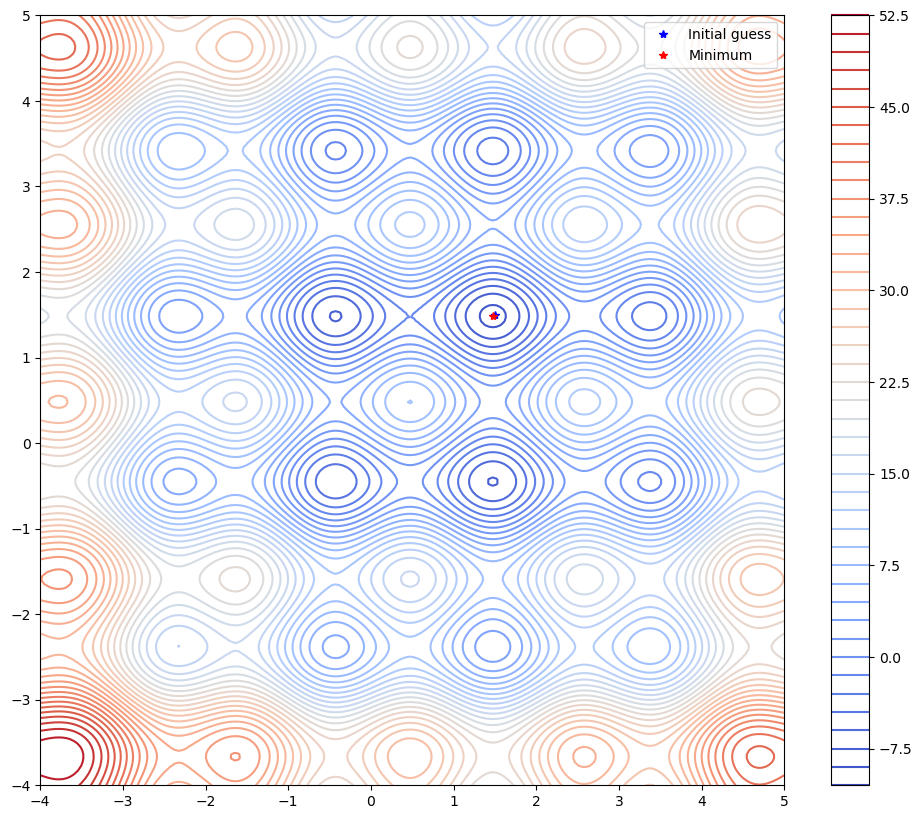

In [22]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,200),np.linspace(-4,5, 200))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
ax.legend()
ax.grid(False)

Instead of using directly the methods in  `optimize`, we can use a general interface,  `minimize`, selecting the method as an argument.

In [23]:
result = optimize.minimize(f, x_ini, method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -9.520229273055016
        x: [ 1.476e+00  1.484e+00]
      nit: 4
      jac: [-7.153e-07 -8.345e-07]
 hess_inv: [[ 2.416e-02  4.605e-06]
            [ 4.605e-06  1.635e-02]]
     nfev: 21
     njev: 7

Note that in this case the optimal point is in attribute `x`!

# Nonlinear least square problems

We saw least square approximation, but if the law undelying our data depends *nonlinearly* on some parameters, such as

$$ f(x) = b_0 + b_1 e^{-b_2\,x}$$

we have to use a different approach.

In [24]:
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2*x)

In [25]:
xdata = np.linspace(0,5,50)
b = (0.25, 0.75, 0.5)
ydata = f(xdata, *b)
ydata = ydata + 0.05*rd.randn(len(xdata))

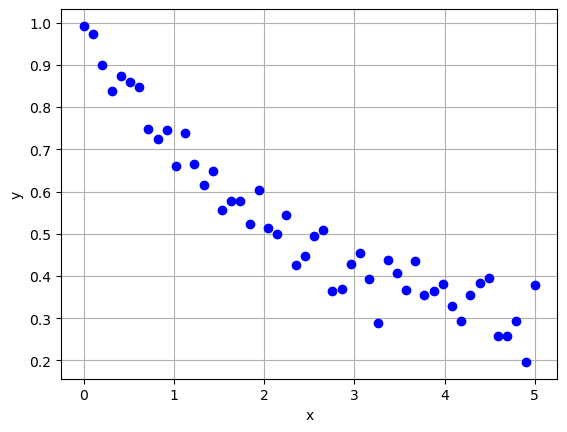

In [26]:
fig, ax = plt.subplots()
ax.plot(xdata, ydata,'bo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

Define the fucntion difference between the data and the law given the values of parameters

In [27]:
def g(b):
    return ydata - f(xdata, *b)

We use `leastsq` in order to estimate the parameters $b_0, b_1, b_2$.

In [28]:
b_ini = (1,1,1)
b_opt, b_cov = optimize.leastsq(g, b_ini)
b_opt

array([0.22275017, 0.76620019, 0.45845296])

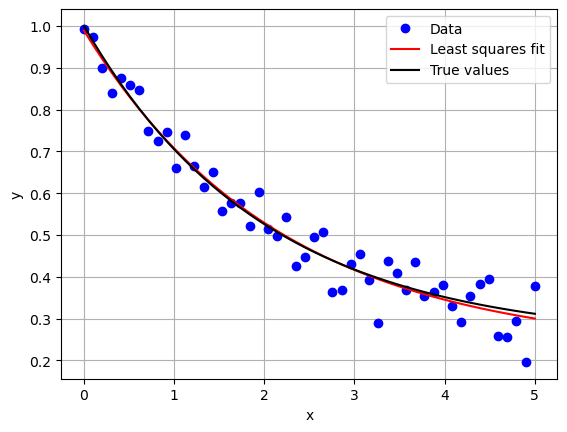

In [29]:
fig, ax = plt.subplots()
ax.plot(xdata, ydata,'bo', label='Data')
ax.plot(xdata, f(xdata, *b_opt),'r-', label='Least squares fit')
ax.plot(xdata, f(xdata, *b),'k-', label='True values')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

There is as specific tool to fit the values of parameters *without* having to define the difference function: `curve_fit` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

In [31]:
b_opt, b_cov = optimize.curve_fit(f, xdata, ydata, b_ini)
b_opt

array([0.22275017, 0.76620019, 0.45845296])

# Constrained optimization

The variables can be subjected to bounds or constraints.

Find the minimum of

$$f(x_0, x_1) = (x_0 -1)^2 + (x_1-1)^2$$

with the following bound on $x$:

$$x_0 \in [2, 3],\quad x_1 \in [0, 2]$$

In [32]:
def f(x):
    return (x[0]-1)**2 + (x[1]-1)**2

The corresponding *unconstrained* optimization problem gives:

In [33]:
x_ini = [2.5,1]
x_opt = optimize.minimize(f, x_ini, method='BFGS')
x_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.071276463850941e-16
        x: [ 1.000e+00  1.000e+00]
      nit: 2
      jac: [ 6.565e-09 -2.936e-08]
 hess_inv: [[ 5.000e-01  7.377e-09]
            [ 7.377e-09  1.000e+00]]
     nfev: 9
     njev: 3

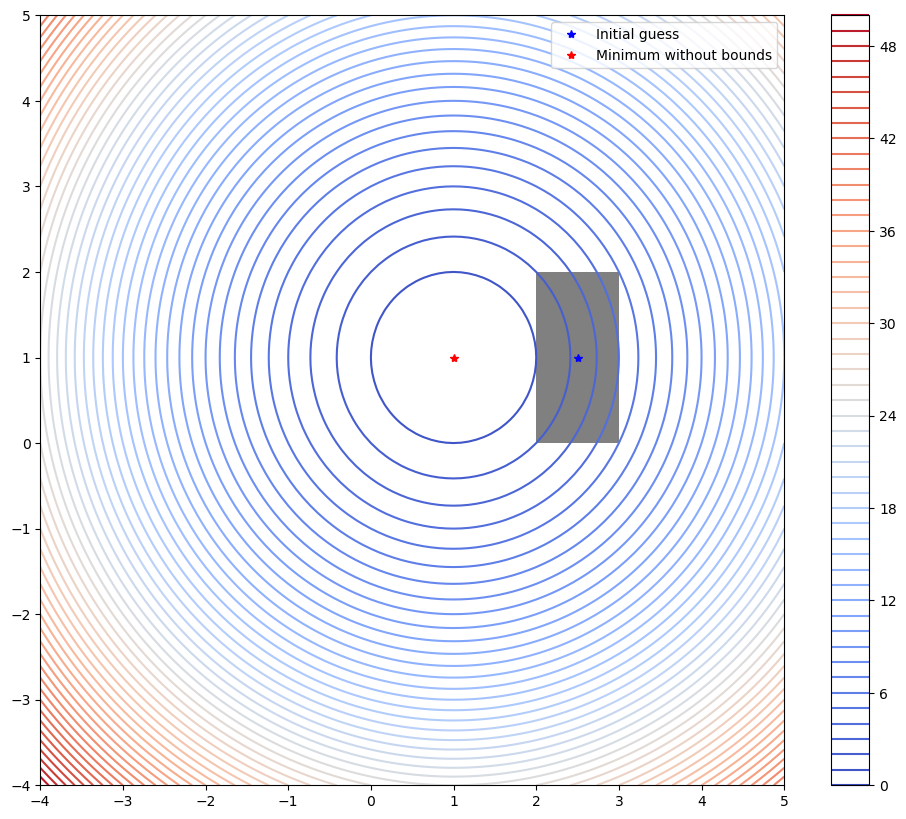

In [34]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,100),np.linspace(-4,5,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without bounds')

bound_rect = plt.Rectangle((2,0),1,2,facecolor="grey")
ax.add_patch(bound_rect)
ax.legend()
ax.grid(False)

The value of $x_0$ for the miminum is outside the bounds.

One method for constrained optimization is `L-BFGS-B` (see [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html)), which requires the bounds of the variables.

In [35]:
x_cons_opt = optimize.minimize(f, [1,1], method='L-BFGS-B', bounds=[(2,3),(0,2)])
x_cons_opt.x

array([2., 1.])

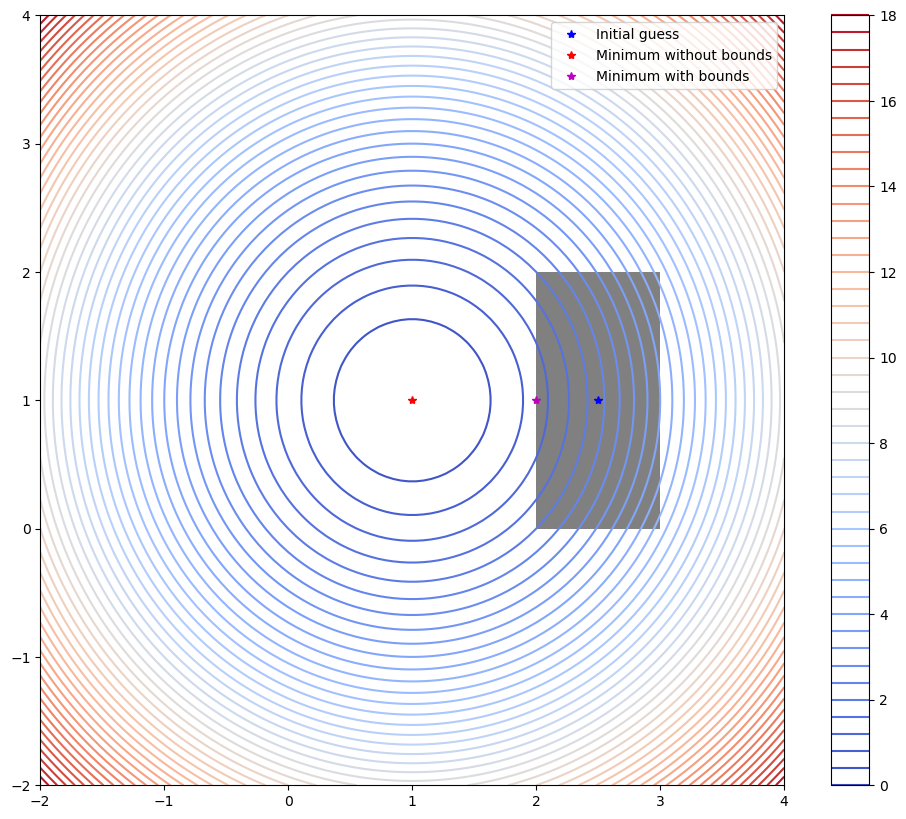

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-2,4,100),np.linspace(-2,4,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without bounds')
ax.plot(x_cons_opt.x[0],x_cons_opt.x[1],'m*', label='Minimum with bounds')

bound_rect = plt.Rectangle((2,0),1,2,facecolor="grey")
ax.add_patch(bound_rect)
ax.legend()
ax.grid(False)

Slighlty different is the case of problem with *constraints*.

Find the mimimum of

$$f(x_0, x_1) = (x_0 -1)^2 + (x_1-1)^2$$

such that

$$g(x) = x_1 - 1.75 - (x_0-0.75)^4 \ge 0$$

In [37]:
def g(x):
    return x[1] - 1.75 - (x[0]-0.75)**4

The constraints are given by a list of dictionaries, where the first value (with key "type") is the type of constarint(equality, inequality) and the second value (with key "fun") is the function defining the constraint. 
The inequality is always "not less than" type.

In [43]:
constraints = [dict(type='ineq', fun=g)]

The method used is`SLSQP` (see [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html)).

In [44]:
x_ini = [1,2]
x_cons_opt = optimize.minimize(f, x_ini, method='SLSQP', constraints=constraints)
x_cons_opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5669164004155391
       x: [ 9.686e-01  1.752e+00]
     nit: 5
     jac: [-6.289e-02  1.505e+00]
    nfev: 16
    njev: 5

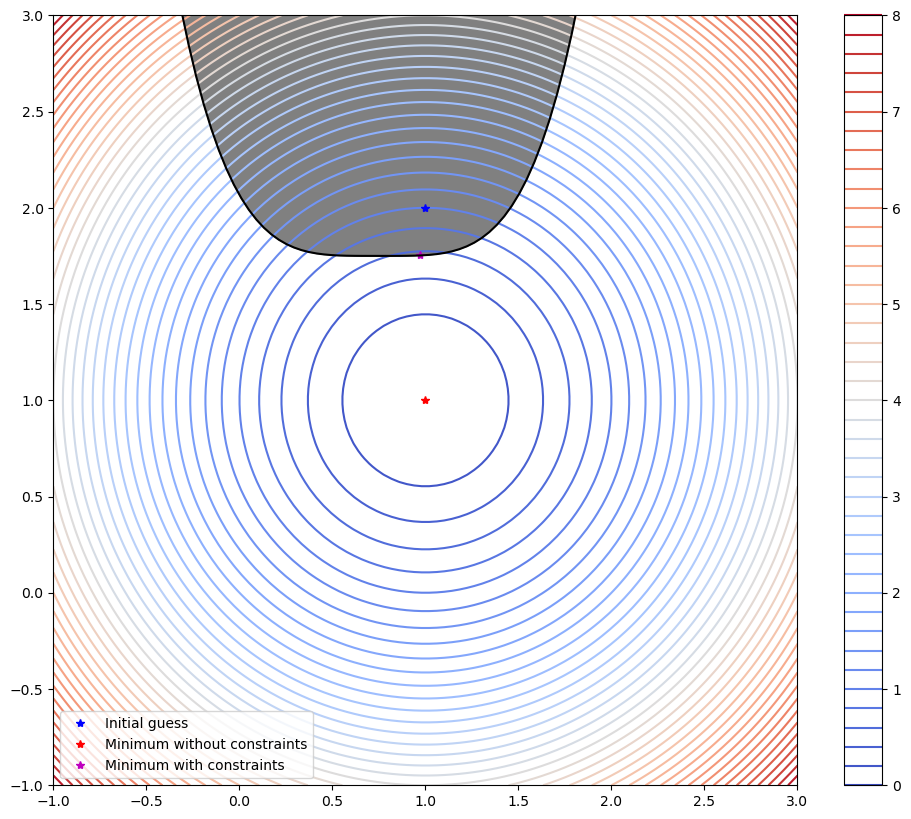

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-1,3,100),np.linspace(-1,3,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without constraints')
ax.plot(x_cons_opt.x[0],x_cons_opt.x[1],'m*', label='Minimum with constraints')

x = np.linspace(-1,3,100)
ax.plot(x, 1.75 + (x-0.75)**4, 'k-')
ax.fill_between(x, 1.75 + (x-0.75)**4, 3, color="grey")

ax.set_xlim([-1,3])
ax.set_ylim([-1,3])
ax.legend()
ax.grid(False)

# Linear programming

If both the function to minimize and the constraints are **linear**, we have a *linear programming* problem.

Minimize

$$f(x) = -x_0 + 2x_1 -3x_2$$

with the following constraints

$$x_0+x_1 \le 1$$
$$-x_0+3x_1 \le 2$$
$$-x_1 + x_2 \le 3$$

In this case, the problem and the constraints can be recast in matrix form.

Minimize

$$f(x) = c^T x$$

with the following constraints:
$$A x \le b$$

where

$$ x = \left[ \begin{array}{r}x_0\\x_1\\x_2\end{array}\right], c = \left[ \begin{array}{r}-1\\2\\-3\end{array}\right], 
 A = \left[ \begin{array}{ccc} 1 & 1 & 0 \\ -1 & 3 & 0 \\ 0 & -1 & 1 \end{array}\right], b = \left[ \begin{array}{r}1 \\ 2 \\ 3 \end{array}\right]$$

In [46]:
c = np.array([-1,2,-3])
A = np.array([[1,1,0],[-1,3,0],[0,-1,1]])
b = np.array([1,2,3])

The method used is`linprog` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)), which implement a variation of the (classical) simplex method.

In [50]:
sol = optimize.linprog(c,A,b,method='highs') # sol = optimize.linprog(c,A,b,method='revised simplex')
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -10.0
              x: [ 1.000e+00  0.000e+00  3.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  0.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.000e+00  0.000e+00]
                 marginals: [-1.000e+00 -0.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# Solving ODEs

We want to solve an ordinary differential equation, ODE.
Ordinary means that we have only one independent variable, say $x$.
The standard *explicit* form with only a function unkwown $y = y(x)$ is

$$ \frac{d^ny}{dx^n} = f\left( x, y, \frac{dy}{dx}, \ldots, \frac{d^{n-1}y}{dx^{n-1}} \right)$$

The initial condition (the values of $y$, $\frac{dy}{dx}$, $\ldots$, $\frac{d^{n-1}y}{dx^{n-1}}$ at $x=0$) are known, which are named **initial** value conditions.

An example with a first-order ODE is the following

$$ y'(x) = f(x, y) = x + y(x)^2$$

with initial condition

$$ y(0) = 0 $$

for 
$$x \in [0, 1.9] $$

In [51]:
def f(y, x):
    return x + y**2

Note that while the function $f$ is in closed form, a *sample* of $y$ at different values of $x$, $x_k$, is returned.

We use the method `odeint` of module `integrate` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)), which implement the LSODA method.

In [52]:
y0 = 0
xp = np.linspace(0,1.9,100)
yp = integrate.odeint(f, y0, xp)

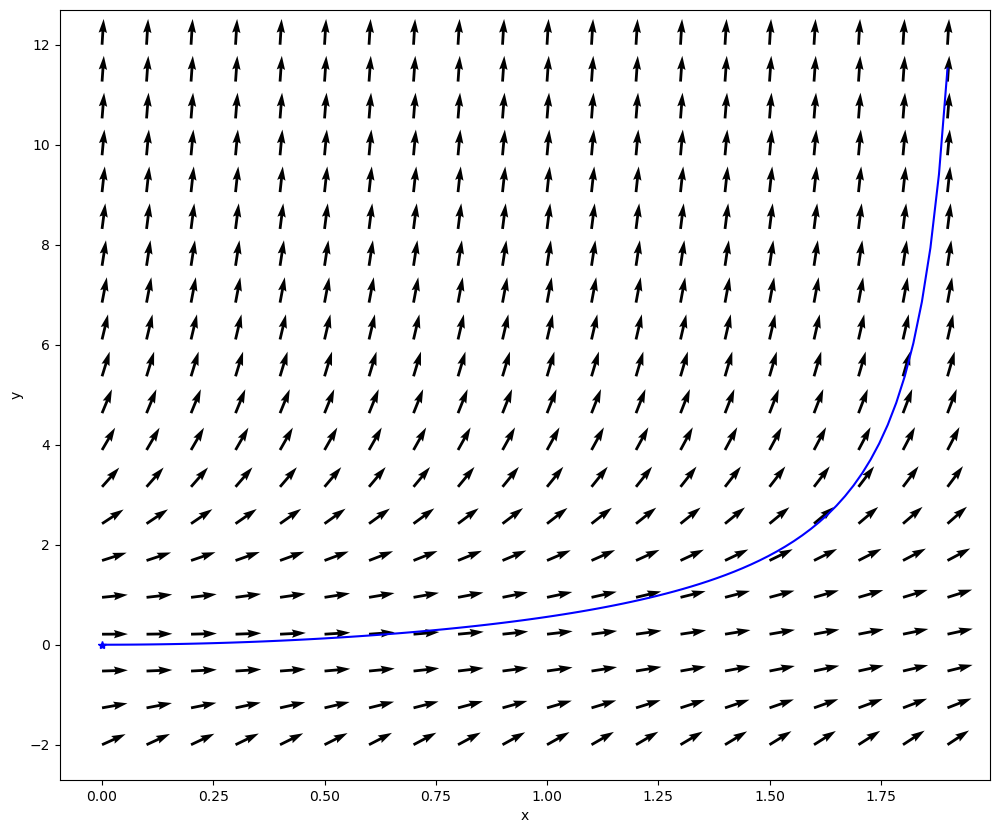

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(xp, yp, 'b-')

X, Y = np.meshgrid(np.linspace(0,1.9,20),np.linspace(-2,12,20))
yprime = np.array([f(y_, x_) for (x_, y_) in zip(X,Y)])

ax.set_xlabel('x')
ax.set_ylabel('y')
alfa = np.arctan(yprime)
ax.quiver(X,Y,np.cos(alfa)*.1, np.sin(alfa)*.1, angles='xy')
ax.plot(0,0,'b*')
ax.grid(False)

Note that $y'$ gives the slope of the tangent, and therefore in the figure above the solution is always tangent to the arrow field with components $\left( \cos\left(\tan^{-1}f(x,y)\right), \sin\left(\tan^{-1}f(x,y)\right) \right)$, which is called *direction field*.

An example of a system with two ordinary differential equations is the Lotka-Volterra predator and prey model.
Given

$$x(t) = \left[ \begin{array}{r} x_0(t) \\ x_1(t) \end{array} \right], x'(t) = \left[ \begin{array}{r} x'_0(t) \\ x'_1(t) \end{array} \right]$$

we have

$$ x'(t) = f(t,x) = \left\{ \begin{array}{l}  ax_0(t) - bx_0x_1(t) \\ cx_0x_1(t) - dx_1(t) \end{array} \right.$$

Where $x_0$ is the number of prey and $x_1$ is the number of predators, $t$ is the independent variable time (which is **not** directly involved in the definition of $f$!).
$a, b, c, d$ are the parameters of the model.

In [54]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(x, t):
    return [a*x[0]-b*x[0]*x[1],c*x[0]*x[1]-d*x[1]]

As an example, suppose that at $t=0$ there are 600 preys and 400 predators.

In [55]:
x0 = [600, 400]
t = np.linspace(0, 50, 250)
x = integrate.odeint(f, x0, t)

Note that the results is an array where the first dimension is the time and the second dimension the sample of the solution ($x_0$ and $x_1$).

In [56]:
x.shape

(250, 2)

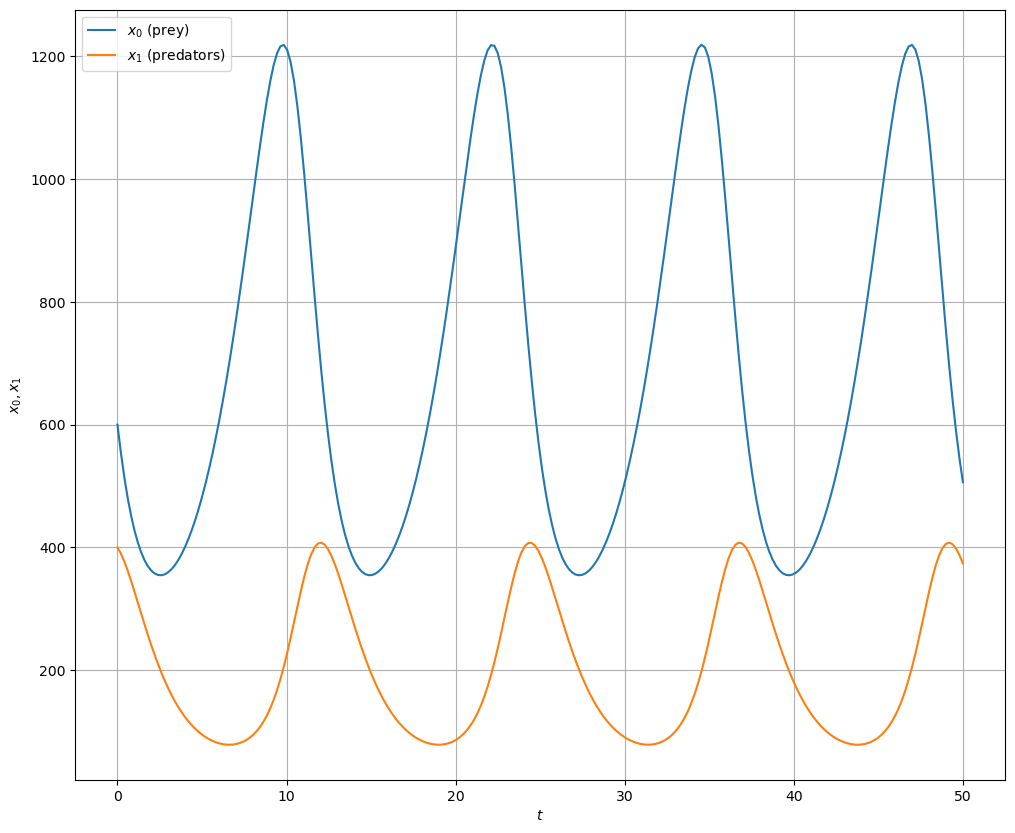

In [57]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(t, x[:,0], label='$x_0$ (prey)')
ax.plot(t, x[:,1], label='$x_1$ (predators)')
ax.set_xlabel('$t$')
ax.set_ylabel('$x_0, x_1$')
ax.legend()
ax.grid(True)

Also in this case is possible to plot the direction field, this time anyway $f$ gives directly the components of the arrows.

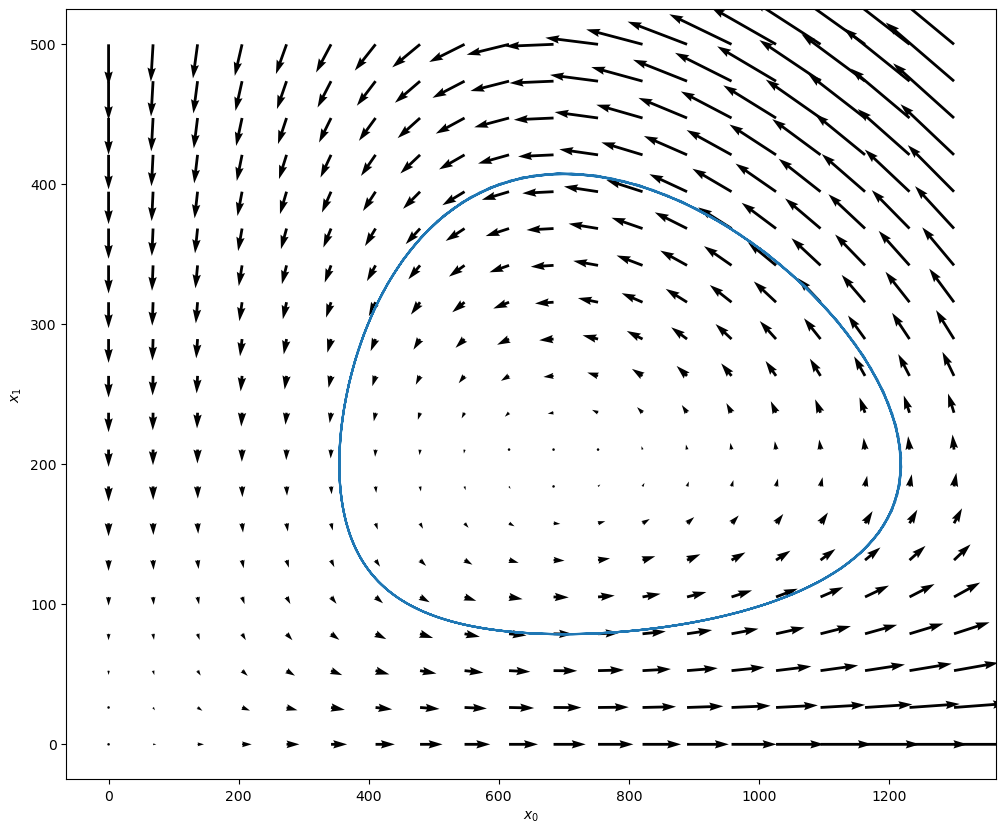

In [58]:
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(x[:,0],x[:,1])

X, Y = np.meshgrid(np.linspace(0,1300,20),np.linspace(0,500,20))
Z = f(np.vstack([X.ravel(),Y.ravel()]),0)

ax.quiver(X,Y,Z[0],Z[1], angles='xy')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.grid(False)

The presence of a closed loop means that it is a stable (periodic) solution.

In the case we have a system of ODE of higher order, we can transform it anyway to a system of first order ODES.

For example, in the case of two masses, $m_0$ and $m_1$, connected by springs with stiffness $k_0$ and $k_1$ and dampers with $c_0$ and $c_1$ in free vibration

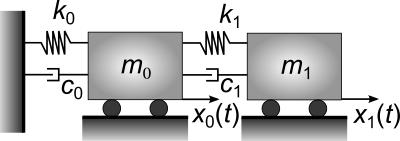

$$ \left\{ \begin{array}{l} m_0 x_0''(t) +c_0 x_0' + k_0 x_0 - k_1 (x_1-x_0) = 0 \\
m_1 x_1''(t) -c_1 x_1' + k_1 (x_1-x_0) = 0 \end{array}\right.$$

Defining

$y_0 = x_0$, $y_1 = x_0'$, $y_2 = x_1$, $y_3 = x_1'$

we have

$$ \left\{ \begin{array}{l} y_0' = y_1 \\
m_0 y_1' +c_0 y_1 + k_0 y_0 - k_1 (y_2-y_0) = 0 \\
y_2' = y_3 \\
m_1 y_3' -c_1 y_3 + k_1 (y_2-y_0) = 0 \end{array} \right.$$

and finally

$$ \left\{ \begin{array}{l} y_0' = y_1\\
y_1' = -\frac{1}{m_0}\left(c_0 y_1 + k_0 y_0 - k_1 (y_2-y_0) \right)\\
y_2' = y_3\\
y_3' = -\frac{1}{m_1}\left( -c_1 y_3 + k_1 (y_2-y_0) \right)\end{array} \right.$$

In this case we use the general interface to the integrators for ODE, `ode`, and therefore the function $f$ is defined in slighly different way (the independent variable is the **first** argument).

In [59]:
def f(t, y, args):
    m0, k0, c0, m1, k1, c1 = args
    return [y[1], -1/m0*(c0*y[1]+k0*y[0]-k1*(y[2]-y[0])), y[3], -1/m1*(-c1*y[3] + k1*(y[2]-y[0]))]

In [60]:
m0, k0, c0 = 1.0, 10., 0.5
m1, k1, c1 = 2.0, 40., 0.25
args = (m0, k0, c0, m1, k1, c1)
y0 = [1.0, 0., 0.5, 0]
t = np.linspace(0,20,1000)

In [61]:
r = integrate.ode(f)

We use the same method seen before, LSODA.

In [62]:
r.set_integrator('lsoda')
r.set_initial_value(y0, t[0])
r.set_f_params(args)

In [63]:
dt = t[1] -t[0]
y = np.zeros((len(t),len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx,:] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [64]:
y

array([[ 1.        ,  0.        ,  0.5       ,  0.        ],
       [ 0.99402078, -0.59507831,  0.50200028,  0.19938373],
       [ 0.97631331, -1.16921418,  0.50794404,  0.39291021],
       ...,
       [-0.36507149, -0.086437  , -0.45415831, -0.10668739],
       [-0.36677541, -0.08374161, -0.45593918, -0.07120229],
       [-0.36842113, -0.08053952, -0.45700932, -0.03572851]])

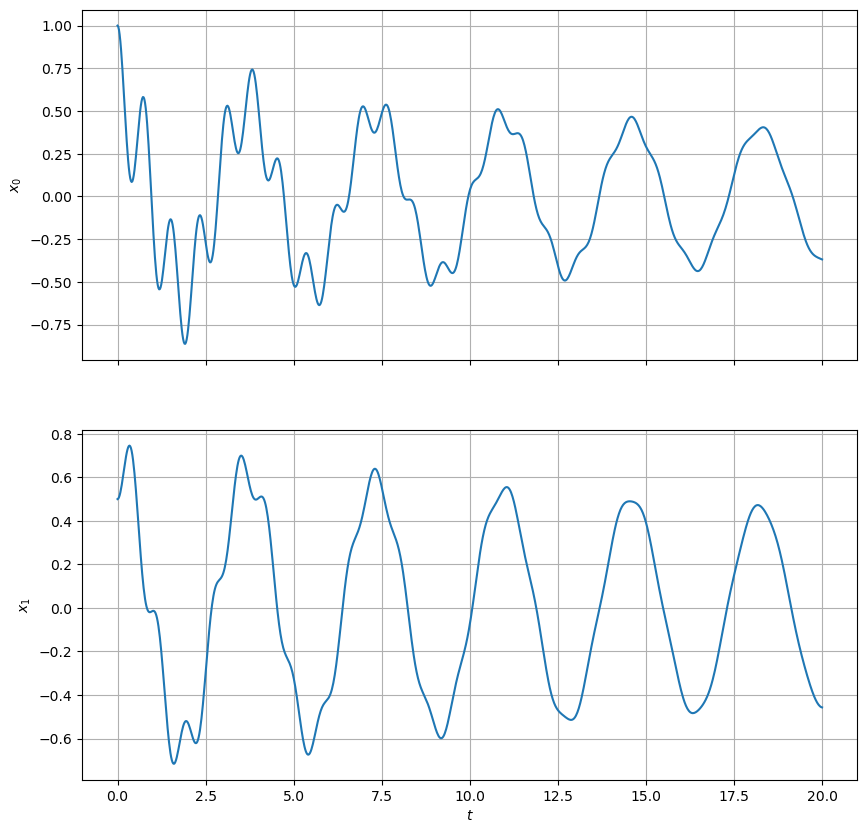

In [65]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.plot(t,y[:,0])
ax1.set_ylabel('$x_0$')
ax1.set_xticklabels([])
ax1.grid(True)
ax2.plot(t,y[:,2])
ax2.set_xlabel('$t$')
ax2.set_ylabel('$x_1$')
ax2.grid(True)